In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Lượng và đại học/PLA Report

[Errno 2] No such file or directory: '/content/drive/MyDrive/Lượng và đại học/PLA Report'
/content


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score

In [ ]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
def cat_or_dog(label):
  return label==3 or label==5

In [ ]:
train_index=[]
test_index=[]
for i in range(len(y_train)):
  if cat_or_dog(y_train[i])==True:
    train_index.append(i)
for i in range(len(y_test)):
  if cat_or_dog(y_test[i])==True:
    test_index.append(i)

In [ ]:
x_train = x_train[train_index]
y_train = y_train[train_index]

x_test = x_test[test_index]
y_test = y_test[test_index]

In [ ]:
y_train = np.where(y_train == 3, -1, 1)
y_test = np.where(y_test == 3, -1, 1)

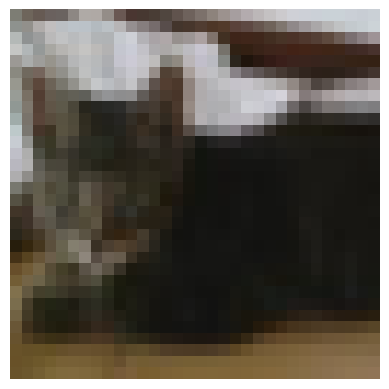

In [ ]:
plt.imshow(x_train[0])
plt.axis("off")
plt.show()

In [ ]:
print(y_train[0])

[-1]


In [ ]:
x_train=x_train.astype("float")/255.0
x_test=x_test.astype("float")/255.0


In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_train, y_train=shuffle(x_train, y_train)

In [ ]:
class Perceptron_PLA:
  def __init__(self, train_features, train_labels):
    self.train_features=train_features
    self.train_labels=train_labels
    self.weights = None

  def predict(self, x):
    f=x.dot(self.weights)
    return np.sign(f)

  def converge(self):
    predictions=[]
    for i in range(len(self.train_features)):
      predictions.append(self.predict(self.train_features[i]))
    predictions=np.array(predictions)
    return np.array_equal(predictions, self.train_labels)

  def accuracy_train(self):
    prediction=self.predict(self.train_features)
    accuracy=accuracy_score(self.train_labels,prediction)
    return accuracy

  def fit(self, iters=1000, learning_rate = 1):
    d = len(self.train_features)
    misclassified_point= []
    completed_iterations=1

    np.random.seed(22520834)
    if self.weights is None:
      self.weights = np.random.uniform(-1, 1, size=(train_features.shape[1]))
    print("Start training:")

    for iter in range(1,iters+1):
      if self.converge() or self.accuracy_train()>0.67:
        print(f"Converged after {iter + 1} iterations")
        break
      progress = (completed_iterations / iters) * 100
      print(f"Iteration {completed_iterations}: {progress:.2f}% completed"+" -- Accuracy: ", self.accuracy_train())

      for i in range(d):
        prediction = self.predict(self.train_features[i])

        if prediction != self.train_labels[i]:
            self.weights = self.weights + int(self.train_labels[i])*(self.train_features[i])*learning_rate

      completed_iterations+=1



In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
x_train=np.insert(x_train,0,1,axis=1)
x_test=np.insert(x_test,0,1,axis=1)

In [ ]:
x_train.shape

(10000, 3073)

In [ ]:
model=Perceptron_PLA(x_train, y_train)

In [ ]:
model.fit()

Start training:
Iteration 1: 0.10% completed -- Accuracy:  0.5003
Iteration 2: 0.20% completed -- Accuracy:  0.5976
Iteration 3: 0.30% completed -- Accuracy:  0.5618
Iteration 4: 0.40% completed -- Accuracy:  0.5734
Iteration 5: 0.50% completed -- Accuracy:  0.5773
Iteration 6: 0.60% completed -- Accuracy:  0.5907
Iteration 7: 0.70% completed -- Accuracy:  0.6249
Iteration 8: 0.80% completed -- Accuracy:  0.5586
Iteration 9: 0.90% completed -- Accuracy:  0.598
Iteration 10: 1.00% completed -- Accuracy:  0.628
Iteration 11: 1.10% completed -- Accuracy:  0.6026
Iteration 12: 1.20% completed -- Accuracy:  0.6285
Iteration 13: 1.30% completed -- Accuracy:  0.6124
Iteration 14: 1.40% completed -- Accuracy:  0.6269
Iteration 15: 1.50% completed -- Accuracy:  0.6379
Iteration 16: 1.60% completed -- Accuracy:  0.6328
Iteration 17: 1.70% completed -- Accuracy:  0.5965
Iteration 18: 1.80% completed -- Accuracy:  0.6066
Iteration 19: 1.90% completed -- Accuracy:  0.5814
Iteration 20: 2.00% comple

In [ ]:
model.accuracy_train()

0.6725

In [ ]:
prediction=model.predict(x_test)
accuracy=accuracy_score(y_test,prediction)
accuracy

0.5715